In [94]:
import librosa
from librosa import display, core
import matplotlib.pylab as plt 

In [95]:
y, sr = librosa.load("kimbs.wav")

In [96]:
print(np.max(y))
print(np.min(y))
print(len(y))

0.888841
-0.904564
7741440


In [97]:
print(y,sr) #y는 전체 frame, sr은 sampling rate
print("전체 Frame:",len(y))
print(len(y)/sr)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  7.7082110e-09
 -5.7574518e-09  4.0870196e-09] 22050
전체 Frame: 7741440
351.0857142857143


In [98]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(tempo)
#print(beat_frames)

129.19921875


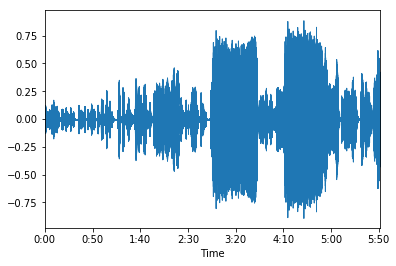

In [99]:
display.waveplot(y)
plt.show()

In [108]:
# 미칠듯 사랑했던 기억이

import IPython.display as ipd
ipd.Audio(clip, rate=sr)

13.0
286650


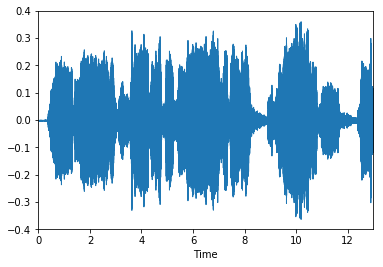

In [100]:
# 1분 53초 ~ 2분 4초
# 113 sec * SR > frame 시작점 
# 124 sec * SR > frame 끝점

clip = y[113*sr:126*sr]
print(len(clip)/sr)
print(len(clip))
display.waveplot(clip)
plt.show()


In [102]:
#https://bl.ocks.org/fasiha/957035272009eb1c9eb370936a6af2eb

from scipy.signal import blackmanharris, fftconvolve
from numpy import argmax, mean, diff, log
from matplotlib.mlab import find
from numpy import polyfit, arange

def parabolic(f, x):
    """Quadratic interpolation for estimating the true position of an
    inter-sample maximum when nearby samples are known.
   
    f is a vector and x is an index for that vector.
   
    Returns (vx, vy), the coordinates of the vertex of a parabola that goes
    through point x and its two neighbors.
   
    Example:
    Defining a vector f with a local maximum at index 3 (= 6), find local
    maximum if points 2, 3, and 4 actually defined a parabola.
   
    In [3]: f = [2, 3, 1, 6, 4, 2, 3, 1]
   
    In [4]: parabolic(f, argmax(f))
    Out[4]: (3.2142857142857144, 6.1607142857142856)
   
    """
    xv = 1/2. * (f[x-1] - f[x+1]) / (f[x-1] - 2 * f[x] + f[x+1]) + x
    yv = f[x] - 1/4. * (f[x-1] - f[x+1]) * (xv - x)
    return (xv, yv)


def parabolic_polyfit(f, x, n):
    """Use the built-in polyfit() function to find the peak of a parabola
    
    f is a vector and x is an index for that vector.
    
    n is the number of samples of the curve used to fit the parabola.
    """    
    a, b, c = polyfit(arange(x-n//2, x+n//2+1), f[x-n//2:x+n//2+1], 2)
    xv = -0.5 * b/a
    yv = a * xv**2 + b * xv + c
    return (xv, yv)


def freq_from_autocorr(sig, fs):
    """
    Estimate frequency using autocorrelation
    """
    # Calculate autocorrelation (same thing as convolution, but with
    # one input reversed in time), and throw away the negative lags
    corr = fftconvolve(sig, sig[::-1], mode='full')
    corr = corr[len(corr)//2:]

    # Find the first low point
    d = diff(corr)
    start = find(d > 0)[0]

    # Find the next peak after the low point (other than 0 lag).  This bit is
    # not reliable for long signals, due to the desired peak occurring between
    # samples, and other peaks appearing higher.
    # Should use a weighting function to de-emphasize the peaks at longer lags.
    peak = argmax(corr[start:]) + start
    px, py = parabolic(corr, peak)

    return fs / px

359.6009422491735


c:\users\junn2\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:71: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.


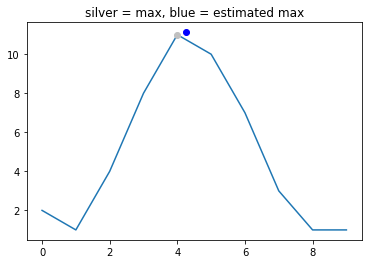

In [77]:
# 미 C4 - 261.62
# 칠 G4 - 391.995
# 듯 F4 - 369.994
# 사 E4 - 329.62
# 랑 F4 - 
# 했 G4
# 던 F4
# 기 A6 - 440
# 억 G4
# 이 G4
# 추 F4
# 억 G4
# 들 F4
# 이 F4
# 너 E4
# 를 F4

print(freq_from_autocorr(clip,sr))

286650
1025
560
[ 0.0005717   0.00069136  0.00059399 ... -0.01970975 -0.0132971
 -0.00412775]
4408 1102 260 65.0
260
4408
4408
4408
260


c:\users\junn2\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.


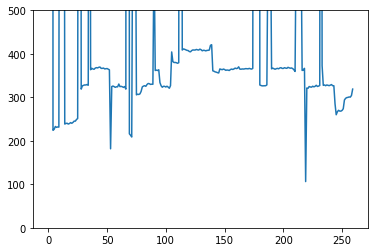

In [104]:
print(len(clip))
print(len(sig_fft))
print(len(sig_fft[1]))

from numpy import hamming

# 13초 짜리 클립을 0.2초 간격으로, 그런데 overlap 은 그것의 다시 4배가 되서 stride 되기로한다.
clip = y[113*sr:126*sr]
print(clip)

stride = int((sr/5)/4)  # 0.2초를 다시 4등분
segment = stride * 4
total_stride = int(len(clip) / stride)
total_x = (len(clip)/sr)*5  # 0.2초간격

print(segment,stride,total_stride,total_x)
# 즉 4410개의 프레임이 한 segment, 1102개씩 stride되어야함, 총 stride는 260개가 될 것이고,
# 그걸 그냥 4408로 하자 (stride * 4)

val = []
print(total_stride)
for i in range(0, total_stride):
    # 3까지는 left_padding, total_stride -4~-1까지는 right padding
    this_seg = np.zeros(segment)    
    
    ## 1st_block
    start_frame = i * stride    
    end_frame_real = ((i+1) * stride) - 1 # this_Seg의 마지막 frame number
    end_frame = ((i+1) * stride) # this_Seg의 마지막 frame number
    
    ## 4th_block
    last_frame = (i+4)*stride
    
    if i < 3: #i가 0,1,2
        #print(i)
        this_seg = np.concatenate((np.zeros(stride*(3-i)), clip[0:end_frame]), axis=0)
        print(len(this_seg))
    elif i > total_stride-4:
        #print(i)
        #print(total_stride - i)
        #print(len(np.zeros(stride*(4-total_stride+i))))
        #print(start_frame, len(clip[start_frame:last_frame]))
        this_seg = np.concatenate((clip[start_frame:last_frame],np.zeros(stride*(4-total_stride+i))), axis=0)
    else:
        this_seg = clip[start_frame:last_frame]
        #print(len(this_seg))
    
    val.append(freq_from_autocorr(this_seg,sr))
    
print(len(val))

#print(_fondamentals(clip,sr))
plt.plot(val)
axes = plt.gca()
axes.set_ylim([0,500])
plt.show()

In [38]:
np.concatenate((np.array([1,2,3]), np.zeros(5)), axis=0)

array([1., 2., 3., 0., 0., 0., 0., 0.])

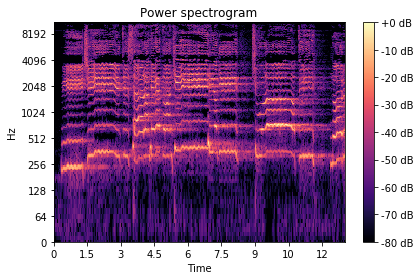

In [107]:
D = np.abs(librosa.stft(clip))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),  y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

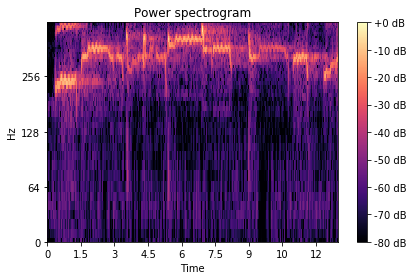

In [106]:
D = np.abs(librosa.stft(clip))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),  y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
axes = plt.gca()
axes.set_ylim([0,500])
plt.show()

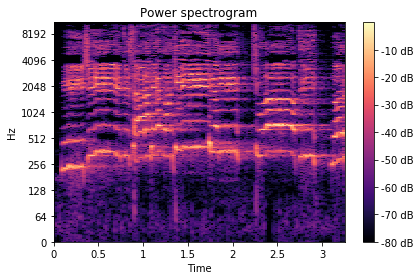

In [37]:
D = np.abs(librosa.stft(clip, n_fft=8192))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),  y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()